For more football coding tutorials, follow the **Python Football Review** on [Substack](https://substack.com/@martinondata), or visit [PythonFootball.com](https://www.pythonfootball.com)

---



In [1]:
import polars as pl
import matplotlib.pyplot as plt

from google.colab import files

In [2]:
pip install fastexcel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.2 MB/s eta 0:00:00


# Load matched names

Load team names reference table. It includes a correspondance between the names from football-data.co.uk and SPI.

In [3]:
uploaded = files.upload()

Saving spi_fd_team_names.xlsx to spi_fd_team_names.xlsx


In [4]:
team_names = pl.read_excel("spi_fd_team_names.xlsx")
team_names

fd_league,fd_team,spi_team,spi_league
str,str,str,str
"""B1""","""Anderlecht""","""Anderlecht""","""Belgian Jupiler League"""
"""B1""","""Antwerp""","""Antwerp""","""Belgian Jupiler League"""
"""B1""","""Beerschot VA""","""KFCO Beerschot-Wilrijk""","""Belgian Jupiler League"""
"""B1""","""Cercle Brugge""","""Cercle Brugge""","""Belgian Jupiler League"""
"""B1""","""Charleroi""","""Sporting de Charleroi""","""Belgian Jupiler League"""
…,…,…,…
"""T1""","""Rizespor""","""Caykur Rizespor""","""Turkish Turkcell Super Lig"""
"""T1""","""Sivasspor""","""Sivasspor""","""Turkish Turkcell Super Lig"""
"""T1""","""Trabzonspor""","""Trabzonspor""","""Turkish Turkcell Super Lig"""


# Load SPI

Load SPI probabilities (the spi_matches CSV file).

In [5]:
uploaded = files.upload()

Saving spi_matches.csv to spi_matches.csv


In [6]:
spi_matches = pl.read_csv("spi_matches.csv")
spi_matches.head()

index,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
i64,i64,str,i64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,2016,"""2016-07-09""",7921,"""FA Women's Super League""","""Liverpool Women""","""Reading""",51.56,50.42,0.4389,0.2767,0.2844,1.39,1.05,null,null,2.0,0.0,null,null,null,null,null,null
1,2016,"""2016-07-10""",7921,"""FA Women's Super League""","""Arsenal Women""","""Notts County Ladies""",46.61,54.03,0.3572,0.3608,0.2819,1.27,1.28,null,null,2.0,0.0,null,null,null,null,null,null
2,2016,"""2016-07-10""",7921,"""FA Women's Super League""","""Chelsea FC Women""","""Birmingham City""",59.85,54.64,0.4799,0.2487,0.2714,1.53,1.03,null,null,1.0,1.0,null,null,null,null,null,null
3,2016,"""2016-07-16""",7921,"""FA Women's Super League""","""Liverpool Women""","""Notts County Ladies""",53.0,52.35,0.4289,0.2699,0.3013,1.27,0.94,null,null,0.0,0.0,null,null,null,null,null,null
4,2016,"""2016-07-17""",7921,"""FA Women's Super League""","""Chelsea FC Women""","""Arsenal Women""",59.43,60.99,0.4124,0.3157,0.2719,1.45,1.24,null,null,1.0,2.0,null,null,null,null,null,null


In [7]:
spi_matches = (
    spi_matches
    .select("season", "date", "league", "team1", "team2", "prob1", "prob2", "probtie")
    .filter(pl.col("league").is_in(["Belgian Jupiler League","German Bundesliga",
                                    "German 2. Bundesliga", "Barclays Premier League",
                                    "English League Championship", "English League One",
                                    "English League Two", "French Ligue 1", "French Ligue 2",
                                    "Greek Super League", "Italy Serie A", "Italy Serie B",
                                    "Dutch Eredivisie", "Portuguese Liga", "Scottish Premiership",
                                    "Spanish Primera Division", "Spanish Segunda Division",
                                    "Turkish Turkcell Super Lig", "German 2, Bundesliga",]))
)
spi_matches

season,date,league,team1,team2,prob1,prob2,probtie
i64,str,str,str,str,f64,f64,f64
2016,"""2016-08-12""","""French Ligue 1""","""Bastia""","""Paris Saint-Germain""",0.0463,0.838,0.1157
2016,"""2016-08-12""","""French Ligue 1""","""AS Monaco""","""Guingamp""",0.5714,0.1669,0.2617
2016,"""2016-08-13""","""Barclays Premier League""","""Hull City""","""Leicester City""",0.3459,0.3621,0.2921
2016,"""2016-08-13""","""Barclays Premier League""","""Middlesbrough""","""Stoke City""",0.438,0.2692,0.2927
2016,"""2016-08-13""","""Barclays Premier League""","""Burnley""","""Swansea City""",0.4482,0.2663,0.2854
…,…,…,…,…,…,…,…
2022,"""2023-06-04""","""Spanish Primera Division""","""Villarreal""","""Atletico Madrid""",0.4042,0.3104,0.2854
2022,"""2023-06-04""","""Spanish Primera Division""","""Elche""","""Cadiz""",0.384,0.3269,0.2892
2022,"""2023-06-04""","""Spanish Primera Division""","""Mallorca""","""Rayo Vallecano""",0.4132,0.2835,0.3033


Add fd names

In [8]:
team1 = team_names.filter(pl.col("spi_team").is_not_null()).rename({"spi_team":"team1", "spi_league": "league"})
team1

team2 = team_names.filter(pl.col("spi_team").is_not_null()).rename({"spi_team":"team2", "spi_league": "league"})
team2

fd_league,fd_team,team2,league
str,str,str,str
"""B1""","""Anderlecht""","""Anderlecht""","""Belgian Jupiler League"""
"""B1""","""Antwerp""","""Antwerp""","""Belgian Jupiler League"""
"""B1""","""Beerschot VA""","""KFCO Beerschot-Wilrijk""","""Belgian Jupiler League"""
"""B1""","""Cercle Brugge""","""Cercle Brugge""","""Belgian Jupiler League"""
"""B1""","""Charleroi""","""Sporting de Charleroi""","""Belgian Jupiler League"""
…,…,…,…
"""T1""","""Rizespor""","""Caykur Rizespor""","""Turkish Turkcell Super Lig"""
"""T1""","""Sivasspor""","""Sivasspor""","""Turkish Turkcell Super Lig"""
"""T1""","""Trabzonspor""","""Trabzonspor""","""Turkish Turkcell Super Lig"""


In [9]:
spi_matches = (
 spi_matches
 .join(team1, on = ["team1", "league"]).drop("team1", "fd_league").rename({"fd_team":"team1"})
 .join(team2, on = ["team2", "league"]).drop("team2").rename({"fd_team":"team2"})
 .with_columns(
     (1/pl.col("prob1")).round(2).alias("fair_home"),
      (1/pl.col("prob2")).round(2).alias("fair_away"),
      (1/pl.col("probtie")).round(2).alias("fair_draw")
 )
 .drop("prob1", "prob2", "probtie", "league")
 .rename({"team1": "home_team", "team2": "away_team", "fd_league": "league"})
 .select("season", "date", "home_team", "away_team",
         "fair_home", "fair_draw", "fair_away")
 .with_columns( pl.col("date").str.strptime(pl.Date, "%Y-%m-%d"))
)
spi_matches

season,date,home_team,away_team,fair_home,fair_draw,fair_away
i64,date,str,str,f64,f64,f64
2016,2016-08-12,"""Bastia""","""Paris SG""",21.6,8.64,1.19
2016,2016-08-12,"""Monaco""","""Guingamp""",1.75,3.82,5.99
2016,2016-08-13,"""Hull""","""Leicester""",2.89,3.42,2.76
2016,2016-08-13,"""Middlesbrough""","""Stoke""",2.28,3.42,3.71
2016,2016-08-13,"""Burnley""","""Swansea""",2.23,3.5,3.76
…,…,…,…,…,…,…
2022,2023-06-04,"""Villarreal""","""Ath Madrid""",2.47,3.5,3.22
2022,2023-06-04,"""Elche""","""Cadiz""",2.6,3.46,3.06
2022,2023-06-04,"""Mallorca""","""Vallecano""",2.42,3.3,3.53


# Load odds

In [10]:
# Define seasons and leagues
seasons_list = [f"{str(year)[2:]}{str(year + 1)[2:]}" for year in range(2016, 2023)]
leagues_list = ["E0", "E1", "E2", "E3", "SC0", "D1", "D2",
                "SP1", "SP2", "I1", "I2", "F1", "F2", "B1", "N1", "P1", "T1", "G1"]

odds_data_import = []

for league in leagues_list:
    for season in seasons_list:
        url = f"https://www.football-data.co.uk/mmz4281/{season}/{league}.csv"

        season_data = pl.read_csv(
            url,
            #try_parse_dates=True,
            ignore_errors=True,
            encoding="latin1",
            columns=["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR",
                      "PSCH", "PSCD", "PSCA"])

        starting_year = 2000 + int(season[:2])
        season_data = season_data.with_columns(
            pl.lit(starting_year).alias("season"))

        odds_data_import.append(season_data)

odds_data = pl.concat(odds_data_import)
odds_data.head()

shape: (5, 11)
┌─────┬──────────┬────────────────┬────────────┬───┬──────┬──────┬──────┬────────┐
│ Div ┆ Date     ┆ HomeTeam       ┆ AwayTeam   ┆ … ┆ PSCH ┆ PSCD ┆ PSCA ┆ season │
│ --- ┆ ---      ┆ ---            ┆ ---        ┆   ┆ ---  ┆ ---  ┆ ---  ┆ ---    │
│ str ┆ str      ┆ str            ┆ str        ┆   ┆ f64  ┆ f64  ┆ f64  ┆ i32    │
╞═════╪══════════╪════════════════╪════════════╪═══╪══════╪══════╪══════╪════════╡
│ E0  ┆ 13/08/16 ┆ Burnley        ┆ Swansea    ┆ … ┆ 2.79 ┆ 3.16 ┆ 2.89 ┆ 2016   │
│ E0  ┆ 13/08/16 ┆ Crystal Palace ┆ West Brom  ┆ … ┆ 2.25 ┆ 3.15 ┆ 3.86 ┆ 2016   │
│ E0  ┆ 13/08/16 ┆ Everton        ┆ Tottenham  ┆ … ┆ 3.64 ┆ 3.54 ┆ 2.16 ┆ 2016   │
│ E0  ┆ 13/08/16 ┆ Hull           ┆ Leicester  ┆ … ┆ 4.68 ┆ 3.5  ┆ 1.92 ┆ 2016   │
│ E0  ┆ 13/08/16 ┆ Man City       ┆ Sunderland ┆ … ┆ 1.25 ┆ 6.5  ┆ 14.5 ┆ 2016   │
└─────┴──────────┴────────────────┴────────────┴───┴──────┴──────┴──────┴────────┘


In [11]:
odds_data = (
    odds_data
    .with_columns(
        pl.col("Date")
            .str.replace(r"/(\d{2})$", r"/20$1")
            .alias("Date")
    )
    .with_columns(
        pl.col("Date").str.strptime(pl.Date, "%d/%m/%Y")
    )
)

odds_data = (
    odds_data
    .rename({"Div":"league", "Date":"date",
             "HomeTeam":"home_team", "AwayTeam":"away_team",
             "FTHG":"home_goals", "FTAG":"away_goals",
             "FTR":"result", "PSCH":"home_odds", "PSCD":"draw_odds",
             "PSCA":"away_odds"})
)
odds_data

league,date,home_team,away_team,home_goals,away_goals,result,home_odds,draw_odds,away_odds,season
str,date,str,str,i64,i64,str,f64,f64,f64,i32
"""E0""",2016-08-13,"""Burnley""","""Swansea""",0,1,"""A""",2.79,3.16,2.89,2016
"""E0""",2016-08-13,"""Crystal Palace""","""West Brom""",0,1,"""A""",2.25,3.15,3.86,2016
"""E0""",2016-08-13,"""Everton""","""Tottenham""",1,1,"""D""",3.64,3.54,2.16,2016
"""E0""",2016-08-13,"""Hull""","""Leicester""",2,1,"""H""",4.68,3.5,1.92,2016
"""E0""",2016-08-13,"""Man City""","""Sunderland""",2,1,"""H""",1.25,6.5,14.5,2016
…,…,…,…,…,…,…,…,…,…,…
"""G1""",2023-05-13,"""Ionikos""","""Lamia""",2,2,"""D""",2.04,3.03,4.41,2022
"""G1""",2023-05-13,"""Levadeiakos""","""Giannina""",3,3,"""D""",2.18,3.13,3.74,2022
"""G1""",2023-05-14,"""AEK""","""Volos NFC""",4,0,"""H""",1.02,25.44,45.69,2022


# Create final db

In [12]:
df = (
    spi_matches
    .join(odds_data, on = ["date", "home_team", "away_team", "season"], how = "left")
    .select("season", "league", "date", "home_team", "away_team", "home_goals", "away_goals",
           "result", "home_odds", "draw_odds", "away_odds", "fair_home", "fair_draw", "fair_away")
    .filter(pl.col("league").is_not_null())
)
df

season,league,date,home_team,away_team,home_goals,away_goals,result,home_odds,draw_odds,away_odds,fair_home,fair_draw,fair_away
i64,str,date,str,str,i64,i64,str,f64,f64,f64,f64,f64,f64
2016,"""F1""",2016-08-12,"""Bastia""","""Paris SG""",0,1,"""A""",12.13,5.29,1.34,21.6,8.64,1.19
2016,"""F1""",2016-08-12,"""Monaco""","""Guingamp""",2,2,"""D""",1.71,3.75,5.87,1.75,3.82,5.99
2016,"""E0""",2016-08-13,"""Hull""","""Leicester""",2,1,"""H""",4.68,3.5,1.92,2.89,3.42,2.76
2016,"""E0""",2016-08-13,"""Middlesbrough""","""Stoke""",1,1,"""D""",2.2,3.38,3.7,2.28,3.42,3.71
2016,"""E0""",2016-08-13,"""Burnley""","""Swansea""",0,1,"""A""",2.79,3.16,2.89,2.23,3.5,3.76
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022,"""SP1""",2023-06-04,"""Villarreal""","""Ath Madrid""",2,2,"""D""",2.74,3.8,2.48,2.47,3.5,3.22
2022,"""SP1""",2023-06-04,"""Elche""","""Cadiz""",1,1,"""D""",2.51,3.2,3.15,2.6,3.46,3.06
2022,"""SP1""",2023-06-04,"""Mallorca""","""Vallecano""",3,0,"""H""",3.17,3.17,2.52,2.42,3.3,3.53


In [13]:
pl.Config.set_tbl_rows(-1)

league_names = {
    "E0": "English Premier League",
    "E1": "English Championship",
    "E2": "English League One",
    "E3": "English League Two",
    "SC0": "Scottish Premiership",
    "D1": "German Bundesliga",
    "D2": "German 2. Bundesliga",
    "SP1": "Spanish La Liga",
    "SP2": "Spanish Segunda División",
    "I1": "Italian Serie A",
    "I2": "Italian Serie B",
    "F1": "French Ligue 1",
    "F2": "French Ligue 2",
    "B1": "Belgian First Division A",
    "N1": "Dutch Eredivisie",
    "P1": "Portuguese Primeira Liga",
    "T1": "Turkish Süper Lig",
    "G1": "Greek Super League"
}

league_map_expr = pl.col("league").replace(league_names).alias("league_name")

league_summary = (
    df
    .with_columns(league_map_expr)
    .group_by(["league", "league_name"])
    .agg([
        pl.count().alias("total_matches"),
        pl.col("season").n_unique().alias("num_seasons"),
        pl.col("season").min().alias("first_season"),
        pl.col("season").max().alias("last_season"),
    ])
    .sort("league")
    .drop("league")
)

league_summary

/tmp/ipython-input-1308658530.py:31: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("total_matches"),


league_name,total_matches,num_seasons,first_season,last_season
str,u32,u32,i64,i64
"""Belgian First Division A""",1303,5,2018,2022
"""German Bundesliga""",1981,7,2016,2022
"""German 2. Bundesliga""",1263,6,2017,2022
"""English Premier League""",2582,7,2016,2022
"""English Championship""",3263,6,2017,2022
"""English League One""",2556,5,2018,2022
"""English League Two""",2594,5,2018,2022
"""French Ligue 1""",2489,7,2016,2022
"""French Ligue 2""",2010,6,2017,2022


In [14]:
pl.Config.set_tbl_rows(10)

polars.config.Config

# Analysis

In [15]:
df_base = (
    df
    # Value calculations
    .with_columns([
        (pl.col("home_odds") / pl.col("fair_home") - 1).alias("value_home"),
        (pl.col("draw_odds") / pl.col("fair_draw") - 1).alias("value_draw"),
        (pl.col("away_odds") / pl.col("fair_away") - 1).alias("value_away"),
    ])

    # Choose prediction based on highest positive value
    .with_columns(
        pl.when((pl.col("value_home") > 0) &
                (pl.col("value_home") >= pl.col("value_draw")) &
                (pl.col("value_home") >= pl.col("value_away"))).then(pl.lit("H"))
        .when((pl.col("value_draw") > 0) &
              (pl.col("value_draw") >= pl.col("value_home")) &
              (pl.col("value_draw") >= pl.col("value_away"))).then(pl.lit("D"))
        .when((pl.col("value_away") > 0) &
              (pl.col("value_away") >= pl.col("value_home")) &
              (pl.col("value_away") >= pl.col("value_draw"))).then(pl.lit("A"))
        .otherwise(pl.lit("NO BET"))
        .alias("prediction")
    )
    .filter(pl.col("prediction") != "NO BET")

    # Prediction value
    .with_columns(
        pl.when(pl.col("prediction") == "H").then(pl.col("value_home"))
         .when(pl.col("prediction") == "D").then(pl.col("value_draw"))
         .when(pl.col("prediction") == "A").then(pl.col("value_away"))
         .alias("prediction_value")
    )

    # Prediction odds
    .with_columns(
        pl.when(pl.col("prediction") == "H").then(pl.col("home_odds"))
         .when(pl.col("prediction") == "D").then(pl.col("draw_odds"))
         .when(pl.col("prediction") == "A").then(pl.col("away_odds"))
         .alias("prediction_odds")
    )
    #.filter(pl.col("prediction_odds") < 3)
    #.filter(pl.col("prediction") == "A")
    #.filter((pl.col("prediction_value") > 0.02) & (pl.col("prediction_value") < 0.1))
)


In [16]:
def apply_flat_staking(df):
    return (
        df
        .with_columns(
            pl.lit(1.0).alias("stake")
        )
        .with_columns(
            pl.when(pl.col("result") == pl.col("prediction"))
                .then(pl.col("prediction_odds") - 1)
                .otherwise(-1)
                .alias("profit")
        )
        .with_columns(
            won = pl.when(pl.col("result") == pl.col("prediction")).then(1).otherwise(0)
        )
    )
flat_df = apply_flat_staking(df_base)

In [17]:
def summarize(df):
    return df.select(
        pl.lit("Flat 1u Bets").alias("strategy"),
        pl.col("profit").sum().alias("profit"),
        pl.len().alias("bets"),
        (pl.col("profit").sum() / pl.len()).alias("ror"),
        pl.col("won").sum().alias("won"),
        (pl.col("won").sum() / pl.len()).alias("win_rate"),
        pl.col("prediction_value").mean().alias("avg_value"),
        pl.col("prediction_odds").mean().alias("avd_odds")
    ).select("strategy", "bets", "won", "win_rate", "avd_odds", "avg_value",  "profit", "ror")

results = summarize(flat_df)
results

strategy,bets,won,win_rate,avd_odds,avg_value,profit,ror
str,u32,i32,f64,f64,f64,f64,f64
"""Flat 1u Bets""",33929,10542,0.310708,3.932546,0.182837,-2114.21,-0.062313


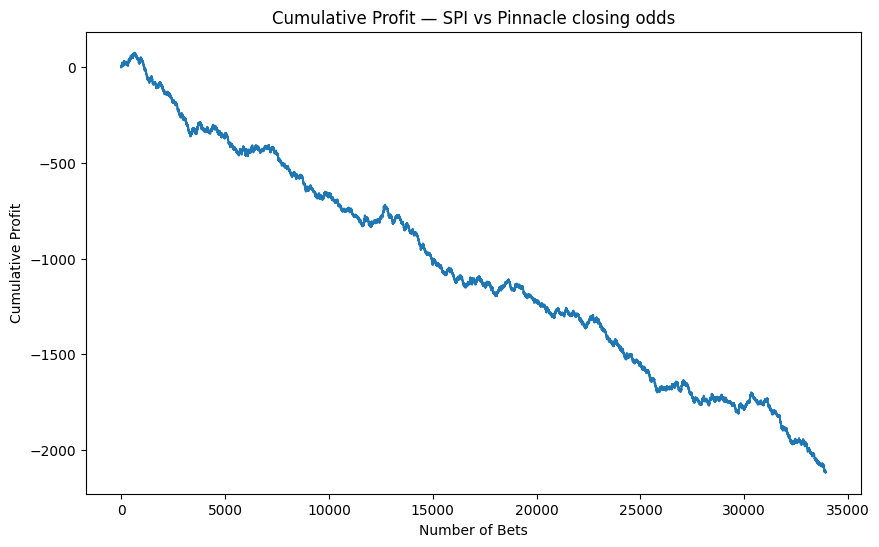

In [18]:
def cumsum(df):
    return (
        df.sort(["season", "date"])
          .with_columns([
              pl.col("profit").cum_sum().alias("cumsum_profit"),
              pl.arange(1, pl.len() + 1).alias("n")
          ])
    )

flat_curve = cumsum(flat_df)

plt.figure(figsize=(10,6))
plt.plot(flat_curve["n"], flat_curve["cumsum_profit"])

plt.xlabel("Number of Bets")
plt.ylabel("Cumulative Profit")
plt.title("Cumulative Profit — SPI vs Pinnacle closing odds")
plt.show()


# Scatter

Compute Fair Pinnacle Probabilities

In [32]:
# Compute raw probabilities from Pinnacle odds
df_cal = df_base.with_columns([

    # Raw probabilities
    (1 / pl.col("home_odds")).alias("p_raw_home"),
    (1 / pl.col("draw_odds")).alias("p_raw_draw"),
    (1 / pl.col("away_odds")).alias("p_raw_away"),
])

# Compute margin per match
df_cal = df_cal.with_columns([
    (pl.col("p_raw_home") + pl.col("p_raw_draw") + pl.col("p_raw_away") - 1)
    .alias("margin")
])

# Apply Equal-Margin Hypothesis to compute fair odds
df_cal = df_cal.with_columns([

    # Fair odds (3 outcomes → multiply by 3)
    (3 * pl.col("home_odds") / (3 - pl.col("margin") * pl.col("home_odds"))).alias("fair_pinn_home"),
    (3 * pl.col("draw_odds") / (3 - pl.col("margin") * pl.col("draw_odds"))).alias("fair_pinn_draw"),
    (3 * pl.col("away_odds") / (3 - pl.col("margin") * pl.col("away_odds"))).alias("fair_pinn_away"),
])

# Convert fair Pinnacle probabilities
df_cal = df_cal.with_columns([
    (1 / pl.col("fair_pinn_home")).alias("prob_pinnacle_home"),
    (1 / pl.col("fair_pinn_draw")).alias("prob_pinnacle_draw"),
    (1 / pl.col("fair_pinn_away")).alias("prob_pinnacle_away"),
])
df_cal

season,league,date,home_team,away_team,home_goals,away_goals,result,home_odds,draw_odds,away_odds,fair_home,fair_draw,fair_away,value_home,value_draw,value_away,prediction,prediction_value,prediction_odds,p_raw_home,p_raw_draw,p_raw_away,margin,fair_pinn_home,fair_pinn_draw,fair_pinn_away,prob_pinnacle_home,prob_pinnacle_draw,prob_pinnacle_away
i64,str,date,str,str,i64,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2016,"""F1""",2016-08-12,"""Bastia""","""Paris SG""",0,1,"""A""",12.13,5.29,1.34,21.6,8.64,1.19,-0.438426,-0.387731,0.12605,"""A""",0.12605,1.34,0.08244,0.189036,0.746269,0.017745,13.067574,5.460871,1.350706,0.076525,0.183121,0.740354
2016,"""E0""",2016-08-13,"""Hull""","""Leicester""",2,1,"""H""",4.68,3.5,1.92,2.89,3.42,2.76,0.619377,0.023392,-0.304348,"""H""",0.619377,4.68,0.213675,0.285714,0.520833,0.020223,4.832452,3.584572,1.945176,0.206934,0.278973,0.514092
2016,"""E0""",2016-08-13,"""Burnley""","""Swansea""",0,1,"""A""",2.79,3.16,2.89,2.23,3.5,3.76,0.251121,-0.097143,-0.231383,"""H""",0.251121,2.79,0.358423,0.316456,0.346021,0.020899,2.845303,3.23113,2.94938,0.351456,0.309489,0.339054
2016,"""E0""",2016-08-13,"""Southampton""","""Watford""",1,1,"""D""",1.8,3.83,4.91,1.74,4.22,5.34,0.034483,-0.092417,-0.080524,"""H""",0.034483,1.8,0.555556,0.261097,0.203666,0.020318,1.822214,3.931994,5.078894,0.548783,0.254324,0.196893
2016,"""E0""",2016-08-13,"""Crystal Palace""","""West Brom""",0,1,"""A""",2.25,3.15,3.86,2.37,3.51,3.4,-0.050633,-0.102564,0.135294,"""A""",0.135294,3.86,0.444444,0.31746,0.259067,0.020972,2.285956,3.220927,3.967047,0.437454,0.31047,0.252077
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022,"""SP1""",2023-06-04,"""Villarreal""","""Ath Madrid""",2,2,"""D""",2.74,3.8,2.48,2.47,3.5,3.22,0.109312,0.085714,-0.229814,"""H""",0.109312,2.74,0.364964,0.263158,0.403226,0.031347,2.82076,3.957123,2.545976,0.354514,0.252709,0.392777
2022,"""SP1""",2023-06-04,"""Elche""","""Cadiz""",1,1,"""D""",2.51,3.2,3.15,2.6,3.46,3.06,-0.034615,-0.075145,0.029412,"""A""",0.029412,3.15,0.398406,0.3125,0.31746,0.028367,2.571019,3.299846,3.246703,0.388951,0.303044,0.308005
2022,"""SP1""",2023-06-04,"""Mallorca""","""Vallecano""",3,0,"""H""",3.17,3.17,2.52,2.42,3.3,3.53,0.309917,-0.039394,-0.286119,"""H""",0.309917,3.17,0.315457,0.315457,0.396825,0.02774,3.265725,3.265725,2.580121,0.306211,0.306211,0.387579


Assign the Pinnacle & SPI fair probabilities for the predicted outcome

In [33]:
df_cal = df_cal.with_columns([

    # FAIR Pinnacle probability for the predicted outcome
    pl.when(pl.col("prediction") == "H").then(pl.col("prob_pinnacle_home"))
     .when(pl.col("prediction") == "D").then(pl.col("prob_pinnacle_draw"))
     .when(pl.col("prediction") == "A").then(pl.col("prob_pinnacle_away"))
     .alias("prob_pinnacle"),

    # FAIR SPI probabilities
    pl.when(pl.col("prediction") == "H").then(1 / pl.col("fair_home"))
     .when(pl.col("prediction") == "D").then(1 / pl.col("fair_draw"))
     .when(pl.col("prediction") == "A").then(1 / pl.col("fair_away"))
     .alias("prob_spi"),

    # Binary indicator if prediction was correct
    (pl.col("result") == pl.col("prediction")).cast(pl.Int8).alias("result_correct")
])


Bin the probabilities (2.5% steps)

In [34]:
bin_width = 0.025

df_binned = df_cal.with_columns([
    ((pl.col("prob_pinnacle") / bin_width).floor() * bin_width).alias("pinnacle_bin"),
    ((pl.col("prob_spi") / bin_width).floor() * bin_width).alias("spi_bin"),
])


Compute actual frequencies per bin

In [35]:
pinnacle_plot = (
    df_binned
    .group_by("pinnacle_bin")
    .agg(actual = pl.col("result_correct").mean())
    .sort("pinnacle_bin")
)

spi_plot = (
    df_binned
    .group_by("spi_bin")
    .agg(actual = pl.col("result_correct").mean())
    .sort("spi_bin")
)


Plot

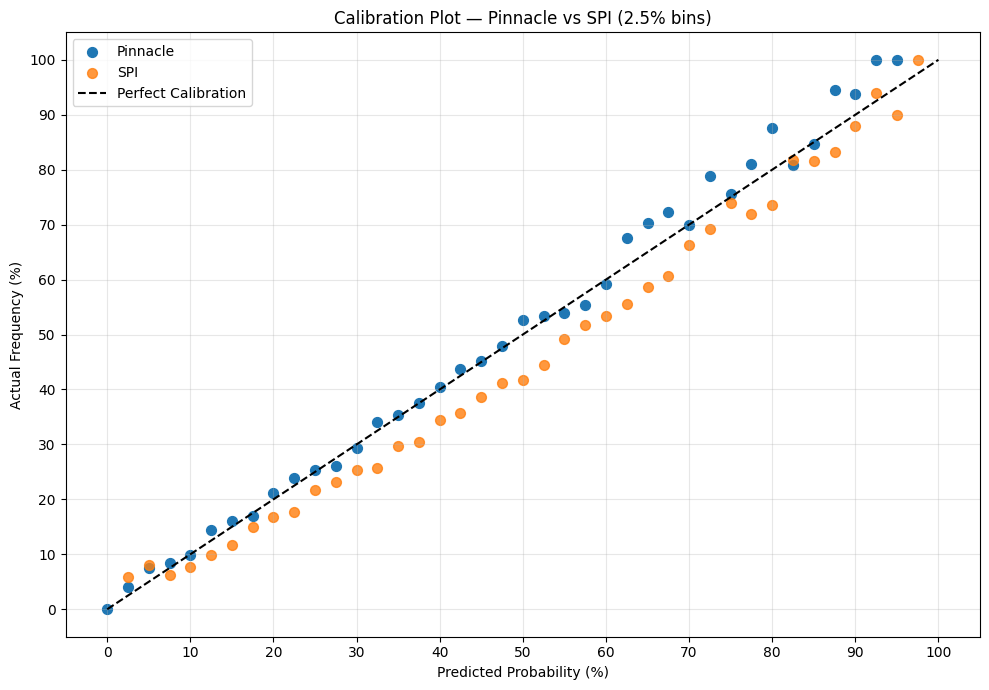

In [38]:
plt.figure(figsize=(10, 7))

plt.scatter(
    pinnacle_plot["pinnacle_bin"]* 100,
    pinnacle_plot["actual"]* 100,
    label="Pinnacle", s=50
)

plt.scatter(
    spi_plot["spi_bin"]* 100,
    spi_plot["actual"]* 100,
    label="SPI", s=50, alpha=0.8
)

plt.plot([0, 100], [0, 100], "k--", label="Perfect Calibration")

plt.xlabel("Predicted Probability (%)")
plt.ylabel("Actual Frequency (%)")
plt.title("Calibration Plot — Pinnacle vs SPI (2.5% bins)")
plt.xticks(range(0, 105, 10))
plt.yticks(range(0, 105, 10))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
